In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df1 = pd.DataFrame(   #converting input to pandas dataframe
    {
        "c1":[2,3,3,4],
        "c2":[6,4,8,6]
    }
)
df1

,c1,c2
0,2,6
1,3,4
2,3,8
3,4,6


In [3]:
df2 = pd.DataFrame(    #converting input to pandas dataframe
    {
        "c1":[3,1,3,5],
        "c2":[0,-2,-4,-2]
    }
)
df2

,c1,c2
0,3,0
1,1,-2
2,3,-4
3,5,-2


## COMPUTING THE COVARIANCE MATRICES

In [4]:
cov1 = df1.cov()  #finding the covariance matrix
cov1

,c1,c2
c1,0.666667,0.000000
c2,0.000000,2.666667


In [5]:
cov2 = df2.cov()   #finding the covariance matrix
cov2

,c1,c2
c1,2.666667,0.000000
c2,0.000000,2.666667


In [6]:
inverse_cov1 = np.linalg.inv(cov1)  #finding inverse of the covariance matrix
inverse_cov1

array([[1.5  , 0.   ],
       [0.   , 0.375]])

In [7]:
inverse_cov2 = np.linalg.inv(cov2)  #finding inverse of the covariance matrix
inverse_cov2

array([[0.375, 0.   ],
       [0.   , 0.375]])

## CASE 3 OF BAYES CLASSIFIER

In [8]:
W1 = -0.5*inverse_cov1  #computing W1
W1

array([[-0.75  , -0.    ],
       [-0.    , -0.1875]])

In [9]:
W2 = -0.5*inverse_cov2   #computing W2
W2

array([[-0.1875, -0.    ],
       [-0.    , -0.1875]])

In [10]:
x1_squared_coefficient_1 = W1[0][0]
x1_squared_coefficient_1

np.float64(-0.75)

In [11]:
x1_x2_coefficient_1 = W1[0][1] + W1[1][0]
x1_x2_coefficient_1


np.float64(-0.0)

In [12]:
x2_squared_coefficient_1 = W1[1][1]
x2_squared_coefficient_1


np.float64(-0.1875)

In [13]:
x1_squared_coefficient_2 = W2[0][0]
x1_squared_coefficient_2

np.float64(-0.1875)

In [14]:
x1_x2_coefficient_2 = W2[0][1] + W2[1][0]
x1_x2_coefficient_2

np.float64(-0.0)

In [15]:
x2_squared_coefficient_2 = W2[1][1]
x2_squared_coefficient_2

np.float64(-0.1875)

In [16]:
mean1 = df1.mean()   #computing the mean vector
mean1

c1    3.0
c2    6.0
dtype: float64

In [17]:
mean2 = df2.mean()  #computing the mean vector
mean2

c1    3.0
c2   -2.0
dtype: float64

In [18]:
w1 = np.matmul(inverse_cov1,mean1)  #computing w1
w1

array([4.5 , 2.25])

In [19]:
w2 = np.matmul(inverse_cov2,mean2)   #computing w2
w2

array([ 1.125, -0.75 ])

In [20]:
x1_coefficient_1 = w1[0]
x1_coefficient_1

np.float64(4.5)

In [21]:
x2_coefficient_1 = w1[1]
x2_coefficient_1

np.float64(2.25)

In [22]:
x1_coefficient_2 = w2[0]
x1_coefficient_2

np.float64(1.125)

In [23]:
x2_coefficient_2 = w2[1]
x2_coefficient_2

np.float64(-0.75)

In [24]:
constant_1 = -0.5*(np.matmul(np.matmul(mean1.transpose(),inverse_cov1),mean1)) -0.5*(math.log(np.linalg.det(cov1)))
constant_1

np.float64(-13.787682072451782)

In [25]:
constant_2 = -0.5*(np.matmul(np.matmul(mean2.transpose(),inverse_cov2),mean2)) -0.5*(math.log(np.linalg.det(cov2)))
constant_2

np.float64(-3.418329253011726)

In [26]:
res_x1_squared_coefficient = x1_squared_coefficient_1 - x1_squared_coefficient_2
res_x1_squared_coefficient

np.float64(-0.5625)

In [27]:
res_x2_squared_coefficient = x2_squared_coefficient_1 - x2_squared_coefficient_2
res_x2_squared_coefficient

np.float64(0.0)

In [28]:
res_x1_coefficient = x1_coefficient_1 - x1_coefficient_2
res_x1_coefficient

np.float64(3.375)

In [29]:
res_x2_coefficient = x2_coefficient_1 - x2_coefficient_2
res_x2_coefficient

np.float64(3.0)

In [30]:
res_constant = constant_1 - constant_2
res_constant

np.float64(-10.369352819440056)

## FINDINF EQUATION OF DECISION BOUNDARY AND PLOTTING

In [31]:
print(f"The equation of the decision boundary is: {-1*res_x1_squared_coefficient}x1^2 = {res_x1_coefficient}x1 + {res_x2_coefficient}x2 + {res_constant}")



The equation of the decision boundary is: 0.5625x1^2 = 3.375x1 + 3.0x2 + -10.369352819440056


In [32]:
x = np.linspace(1,5,100)
y = (0.5625*(x**2) - 3.375*(x) + 10.369352819440056)/3

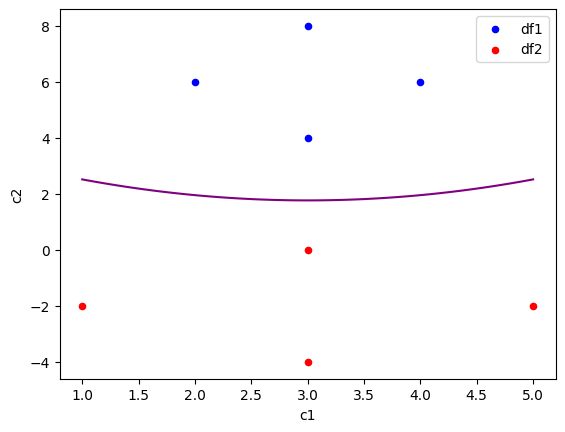

In [33]:
#The decision boundary is quadratic. We plot the curve according to the equation obtained.

fig, ax = plt.subplots()


df1.plot(kind="scatter", x="c1", y="c2", color='blue', label='df1', ax=ax)


df2.plot(kind="scatter", x="c1", y="c2", color='red', label='df2', ax=ax)

plt.plot(x,y,color="purple",label="decision_boundary")

In [34]:
'''THE GIVEN EXAMPLE FALLS UNDER CASE 3 OF THE BAYES DECISION THEORY AS THE COVARIANCE MATRICES ARE NOT EQUAL.  '''

'THE GIVEN EXAMPLE FALLS UNDER CASE 3 OF THE BAYES DECISION THEORY AS THE COVARIANCE MATRICES ARE NOT EQUAL.  '